In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Import Data

In [44]:
# Create df's from csv files
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
# Check size (Train df has one additional column which is label)
print(f'Train shape : {train_df.shape}')
print(f'Test shape  : {train_df.shape}')

Train shape : (42000, 785)
Test shape  : (42000, 785)


# Splitting training df

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Split the data into training and validation sets
# The features for training are all columns starting from the second column
# The target variable is the 'label' column
X_train, X_val, y_train, y_val = train_test_split(train_df.iloc[:, 1:], train_df['label'], test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print(f'Train features shape : {X_train.shape}')
print(f'Train labels shape  : {y_train.shape}')
print(f'Validation features shape : {X_val.shape}')
print(f'Validation labels shape  : {y_val.shape}')


Train features shape : (33600, 784)
Train labels shape  : (33600,)
Validation features shape : (8400, 784)
Validation labels shape  : (8400,)


# Normalization

In [47]:
# Divide each element by 255 to normalize the pixel values to a range between 0 and 1
X_train = X_train/255
X_val = X_val/255
test_df = test_df/255

# One-Hot Encoding

In [48]:
from keras.utils import to_categorical

In [49]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Reshaping

In [50]:
# The reshaping is performed to match the input shape requirements of Convolutional Neural Networks (CNNs)
X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_val = X_val.to_numpy().reshape(-1,28,28,1)
test_df = test_df.to_numpy().reshape(-1,28,28,1)
# Print the shapes of the training and validation sets
print(f'Train features shape : {X_train.shape}')
print(f'Train labels shape  : {y_train.shape}')
print(f'Validation features shape : {X_val.shape}')
print(f'Validation labels shape  : {y_val.shape}')
print(f'Test features shape : {test_df.shape}')


Train features shape : (33600, 28, 28, 1)
Train labels shape  : (33600, 10)
Validation features shape : (8400, 28, 28, 1)
Validation labels shape  : (8400, 10)
Test features shape : (28000, 28, 28, 1)


# Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [52]:
model = Sequential()
# First Convolutional layer with 32 filters, each with a 3x3 kernel and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Second Convolutional layer with 64 filters, each with a 3x3 kernel and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# MaxPooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer with a rate of 0.25
model.add(Dropout(0.25))
# Third Convolutional layer with 128 filters, each with a 3x3 kernel and ReLU activation
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Another MaxPooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Another Dropout layer with a rate of 0.25
model.add(Dropout(0.25))
# Flatten layer to convert the 2D feature maps into a 1D feature vector
model.add(Flatten())
# Fully connected Dense layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))
# Dropout layer with a rate of 0.5
model.add(Dropout(0.5))
# Output Dense layer with 10 units (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))


# Data Augmentation

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(X_train)

# Model Compilation

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [56]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=3, validation_data=(
    X_val, y_val), verbose=0, steps_per_epoch=X_train.shape[0] // 128)


2023-06-26 18:30:10.121132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


# Evaluation

In [57]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

263/263 [==============================] - 4s 15ms/step - loss: 0.0401 - accuracy: 0.9865
Validation loss: 0.0401
Validation accuracy: 0.9865


# Prediction

In [58]:
predictions = model.predict(test_df)
predictions = np.argmax(predictions, axis=1)
predictions

875/875 [==============================] - 12s 14ms/step


array([2, 0, 9, ..., 3, 9, 2])

# Verification

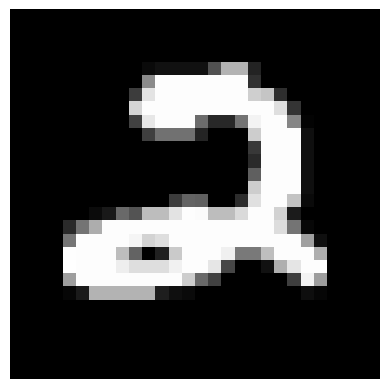

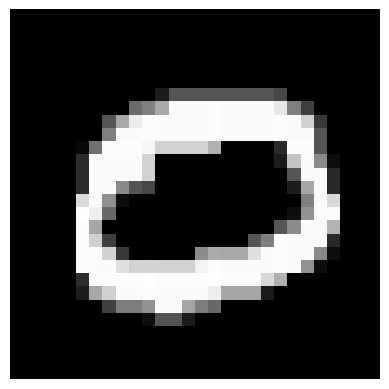

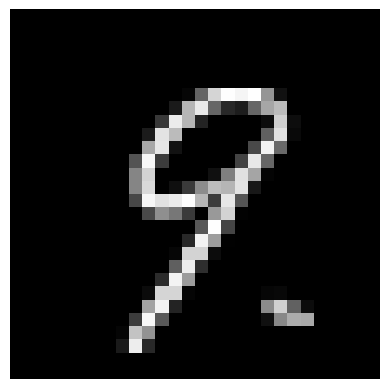

In [59]:
# Display 3 first images from test_df to check model accuracy
data = pd.read_csv('data/test.csv')
for i in range(3):
    # Get pixel values
    pixels = data.values[i]

    # Reshape pixel values into a 2D array
    image = np.reshape(pixels, (28, 28))

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()